<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-JulioOsvaldoHernandezBucio/blob/main/Semana5_DataAnalysisWithPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Semana 5. Data Analysis with Python (IBM). Modulo 2. Julio Osvaldo Hernandez Bucio. A01794366. Jobish. 12/10/22.**

# **Data Pre-processing in Python**

Data pre-processing is a necessary step in data
analysis.
It is the process of converting or mapping data from one “raw” form into another
format to make it ready for further analysis.
Data pre-processing is also often called “data cleaning” or “data wrangling”, and there
are likely other terms.

# **Dealing with Missing Values in Python**

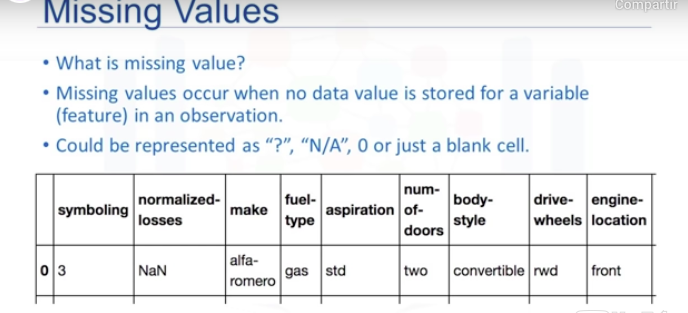

**But how can you deal with missing data?**

• **The first is to check if the person or group that collected the data can go back and find what the actual value should be.**

Another possibility is just to remove the data where that missing value is found.

• **When you drop data, you can either drop the whole variable or just the single data entry with the missing value.**

If you don’t have a lot of observations with missing data, usually dropping the particulare ntry is the best.

If you’re removing data, you want to look to do something that has the least amount of impact.

**• Replacing data is better, since no data is wasted.**

However, it is less accurate since we need to replace missing data with a guess of what the data should be.

One standard replacement technique is to replace missing values by the average value of the entire variable.

But what if the values cannot be averaged, as with categorical variables?

For a variable like ‘fuel-type’, there isn’t an “average” fuel type, since the variable values are not numbers.

In this case, one possibility is to try using the mode –the most common, like “gasoline”.

**• And of course, finally, in some cases, you may simply want to leave the missing data as missing data.**

**To remove data that contains missing values, pandas library has a built-in method called ‘dropna’.**

Essentially, with the dropna method, you can choose to drop rows or columns that contain missing values, like NaN.
So you’ll need to specify “axis=0” to drop the rows, or “axis=1” to drop the columns that contain the missing values.

In [ ]:
 dataframes.dropna()
 axis = 0
 axis = 1

It can simply be done in one line of code using dataframe.dropna().
Setting the argument “inplace” to “true” allows the modification to be done on the dataset directly.

“Inplace=True” just writes the result back into the dataframe.


In [ ]:
df.dropna(subset = ["price"], axis = 0, inplace = True)

In Python, first we calculate the mean of the column.
Then we use the method “replace”, to specify the value we would like to be replaced as the first parameter, in this case, NaN.
The second parameter is the value we would like to replace it with: i.e., the mean, in this example.

In [ ]:
mean = df["normalized-losses"].mean()
df["normalized-losses"].replace(np.nan, mean)

# **Data Formating in Python**

Data formatting means bringing data into a common standard of expression that allows users to make meaningful comparisons.

As a part of dataset cleaning, data formatting ensures that data is consistent and easily
understandable.

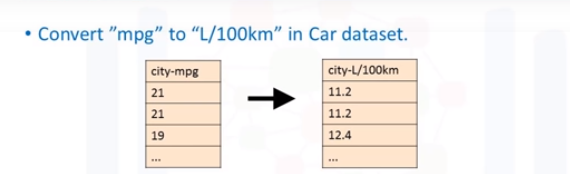

To transform mpg to L/100km we need to divide 235 by each value in the city-mpg column.
In Python, this can easily be done in one line of code.

In [ ]:
df["city-mpg"] = 235/df["city-mpg"]

rename column name from "city-mpg" to "city-L/100km" using
the dataframe.rename() method.

In [ ]:
df.rename(columns = {"city_mpg": "city-L/100km"}, inplace = True)

For example, here we notice that the assigned data type to the price feature is “object” although the expected data type should really be an integer or float type.

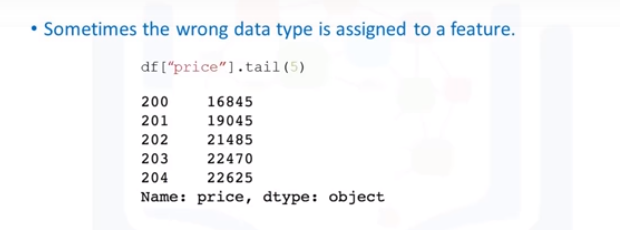

To identify a features data type, in Python we can use the dataframe.dtypes() method and check the datatype of each variable in a dataframe.

In [ ]:
dataframes.dtypes()

In the case of wrong datatypes, the method dataframe.astype() can be used to convert a datatype from one format to another.
For example, using astype(“int”) for the price column, you can convert the object column into an integer type variable.


In [ ]:
In the case of wrong datatypes, the method dataframe.astype() can be used to convert
a datatype from one format to another.
For example, using astype(“int”) for the price column, you can convert the object column
into an integer type variable.

In [ ]:
dataframe.astype()

In [ ]:
df["price"] = df["price"].astype("int")

# **Data Normalization**

When we take a look at the used car data set, we notice in the data that the feature “length” ranges from 150 to 250, while feature “width” and “height” ranges from 50 to 100.

We may want to normalize these variables so that the range of the values is consistent.

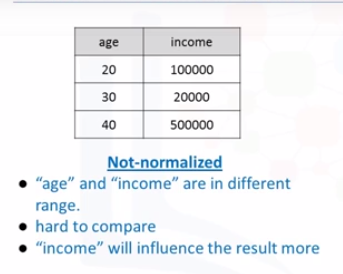

This normalization can make some statistical analyses easier down the road.
By making the ranges consistent between variables, normalization enables a fairer comparison between the different features.

After normalization, both variables now have a similar influence on the models we will build later.

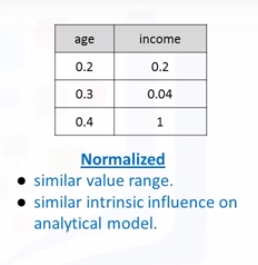

There are several ways to normalize data.

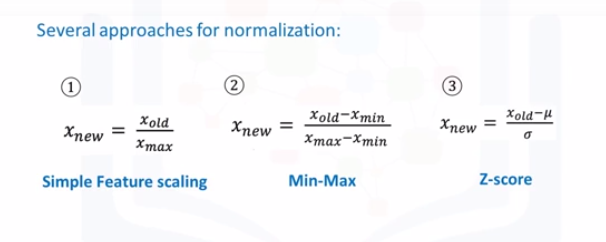

Following our earlier example, we can apply the normalization method on the “length” feature.
First, we use the simple feature scaling method, where we divide it by the maximum value in the feature.

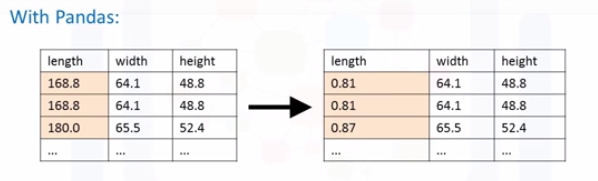

Using the pandas method “max”, this can be done in just one line of code.

In [ ]:
df["length"] = df["length"]/df["length"].max()

Here’s the Min-max method on the “length” feature.
We subtract each value by the minimum of that column, then divide it by the range of that column: the max minus the min.

In [ ]:
df["length"] = (df["length"]-df["length"].min()) / (df["length"]-df["length"].max())

Finally we apply the Z-score method on length feature to normalize the values.

Here, we apply the mean() and std() method on the length feature.

mean() method will return the average value of the feature in the dataset, and std() method will return the standard deviation of the features in the dataset.


In [ ]:
df["length"] = (df["length"]-df["length"].mean()) / (df["length"].std())

# **Binning in Python**

Binning is when you group values together into bins. For example, you can bin “age” into [0 to 5], [6 to 10], [11 to 15] and so on.

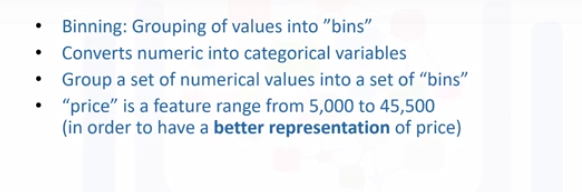

As example, “price” here is an attribute range from 5,000 to 45,500.

Using binning, we categorize the price into three bins: low price, medium price, and high prices.
In the actual car dataset, ”price" is a numerical variable ranging from 5188 to 45400, it has 201 unique values.

We can categorize them into 3 bins: low, medium, and high-priced cars.

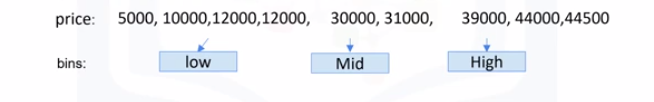

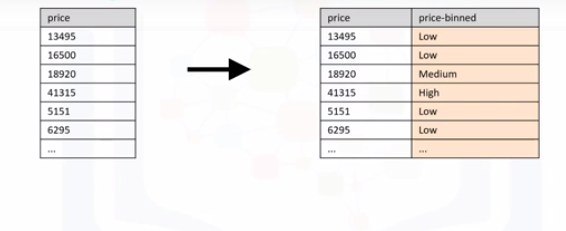

In Python we can easily implement the binning: We would like 3 bins of equal binwidth, so we need 4 numbers as dividers that are equal distance apart.

First we use the numpy function “linspace” to return the array “bins” that contains 4 equally spaced numbers over the specified interval of the price.

In [ ]:
bins = np.linspace(min(df["price"]), max(df["price"]), 4)

We create a list “group_names “ that contains the different bin names.

In [ ]:
group_names = ["Low", "Medium", "High"]

We use the pandas function ”cut” to segment and sort the data values into bins.

In [ ]:
df["price-binned"] = pd.cut(df["price"], bins, labels = group_names, include_lowest = True)

You can then use histograms to visualize the distribution of the data after they’ve been divided into bins.

This is the histogram that we plotted based on the binning that we applied in the price feature.

From the plot, it is clear that most cars have a low price, and only very few cars have high price.

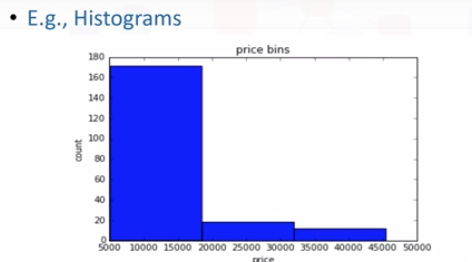

# **Turning categorical variables into quantitative variables in Python**

Most statistical models cannot take in objects or strings as input and, for model training, only take the numbers as inputs.

We encode the values by adding new features corresponding to each unique element in the original feature we would like to encode.

In the case where the feature “Fuel” has two unique values, gas and diesel, we create two new features ‘gas’ and ‘diesel.'

When a value occurs in the original feature we set the corresponding value to one in the new feature; the rest of the features are set to zero.

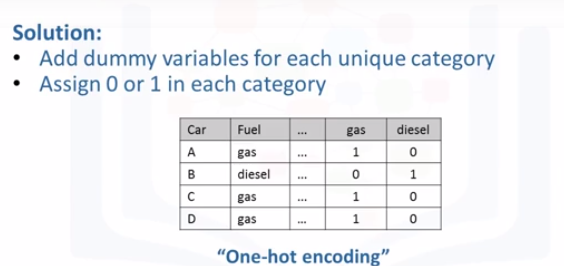

This technique is often called “one-hot encoding”.

In pandas, we can use get_dummies() method to convert categorical variables to dummy variables.

Following the example, pd.get_dummies() method gets the fuel-type column and creates the dataframe"dummy_variable_1".

In [ ]:
pd.get_dummies(df['fuel'])

The get_dummies() method automatically generates a list of numbers, each one corresponding to a particular category of the variable.


# **Labs**

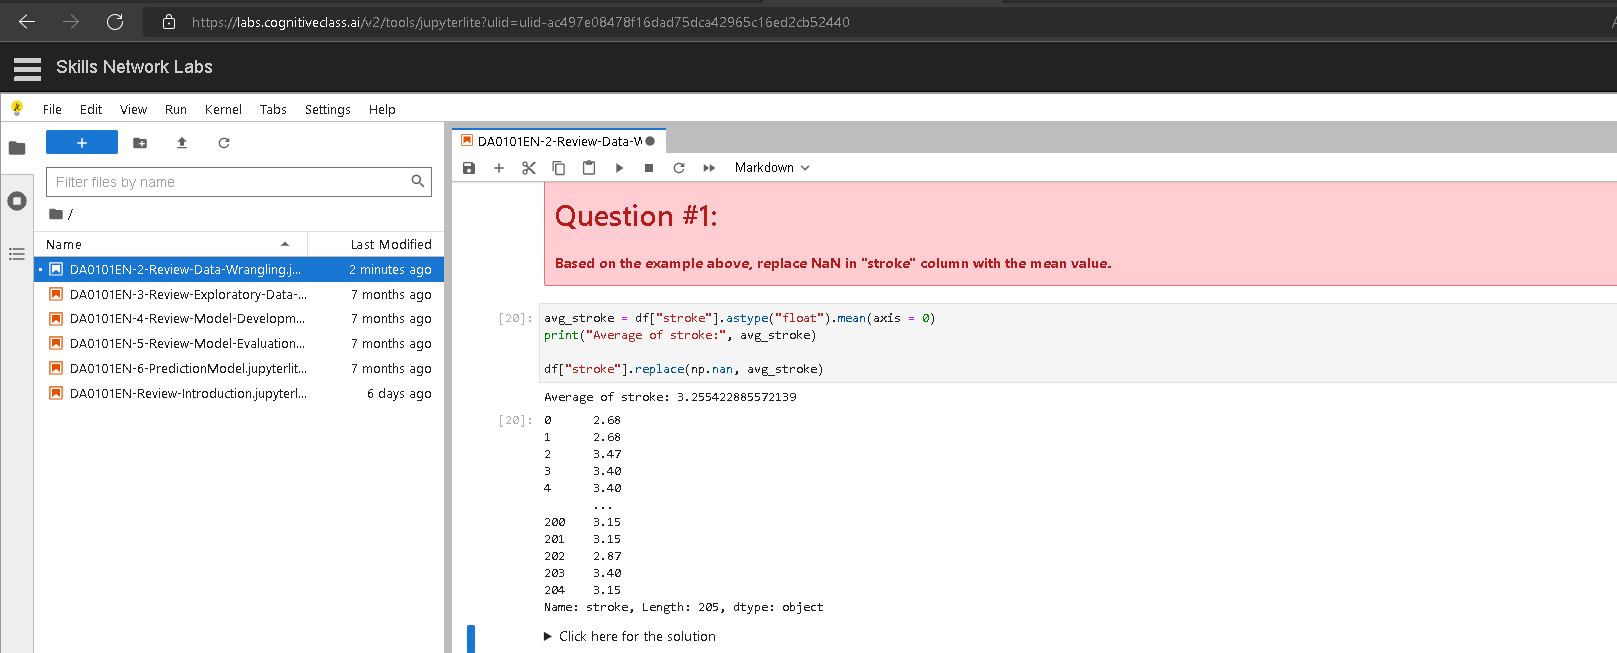


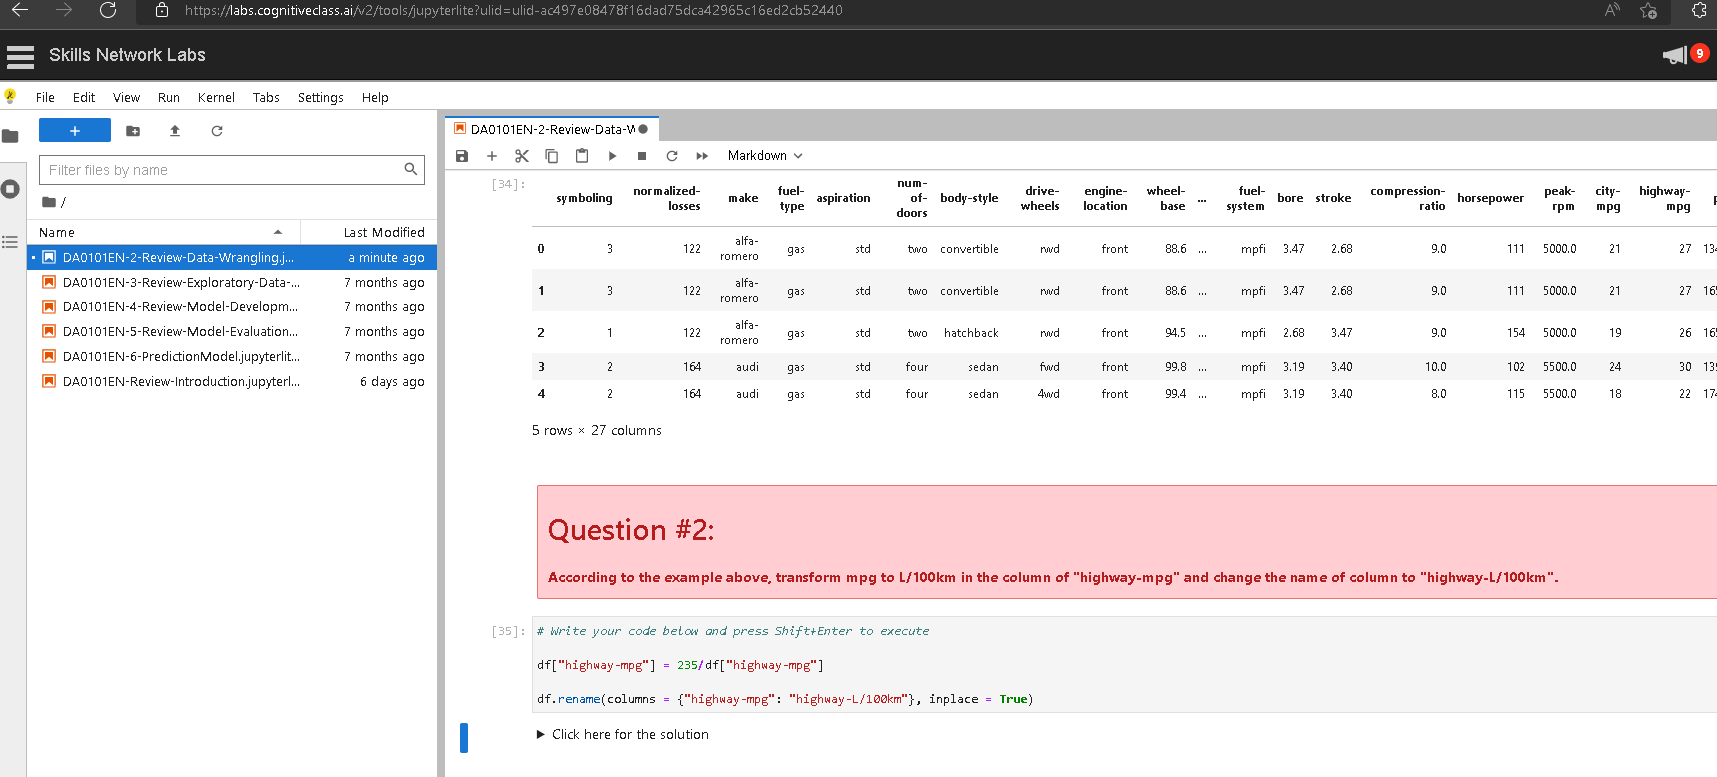

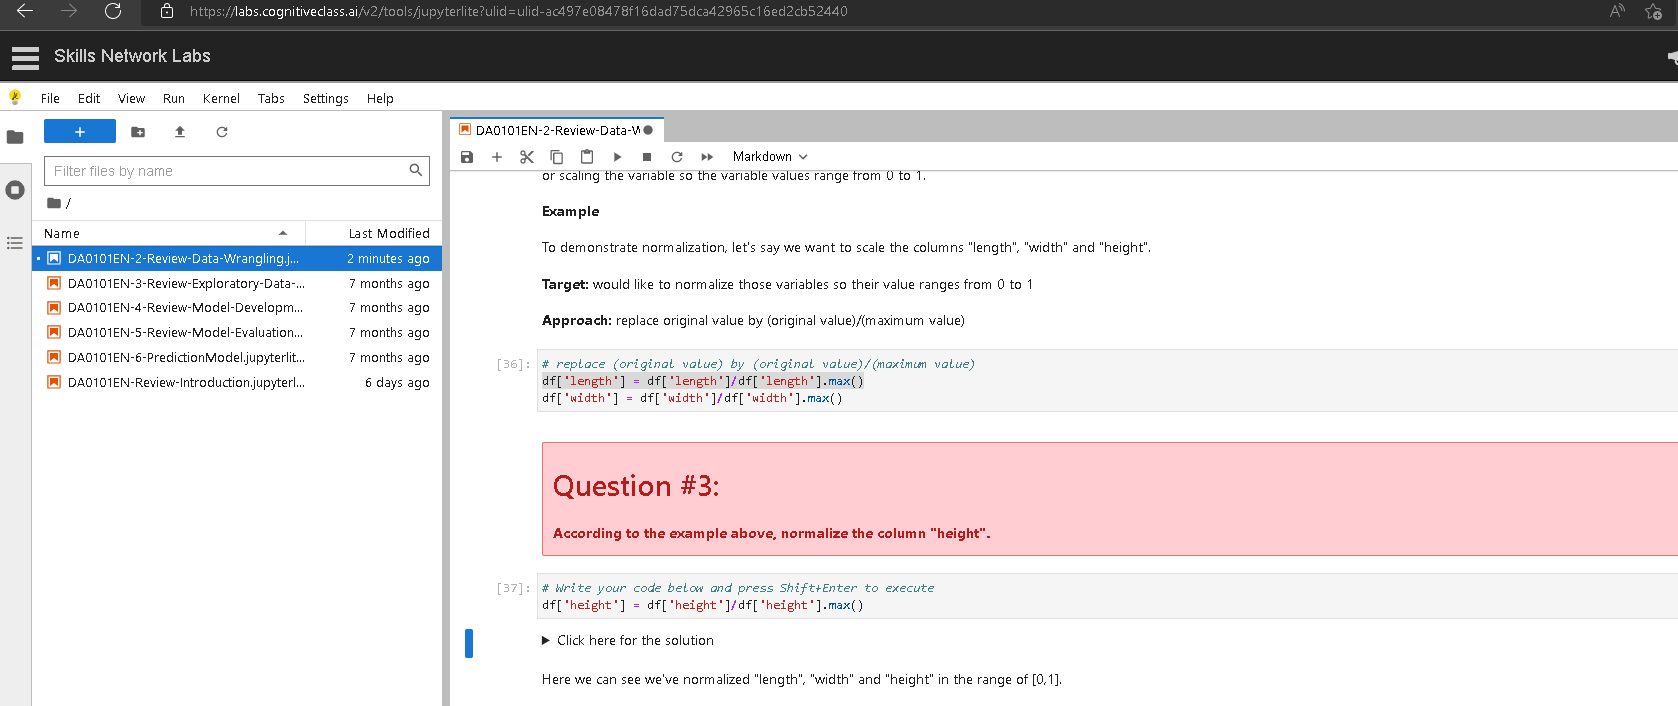

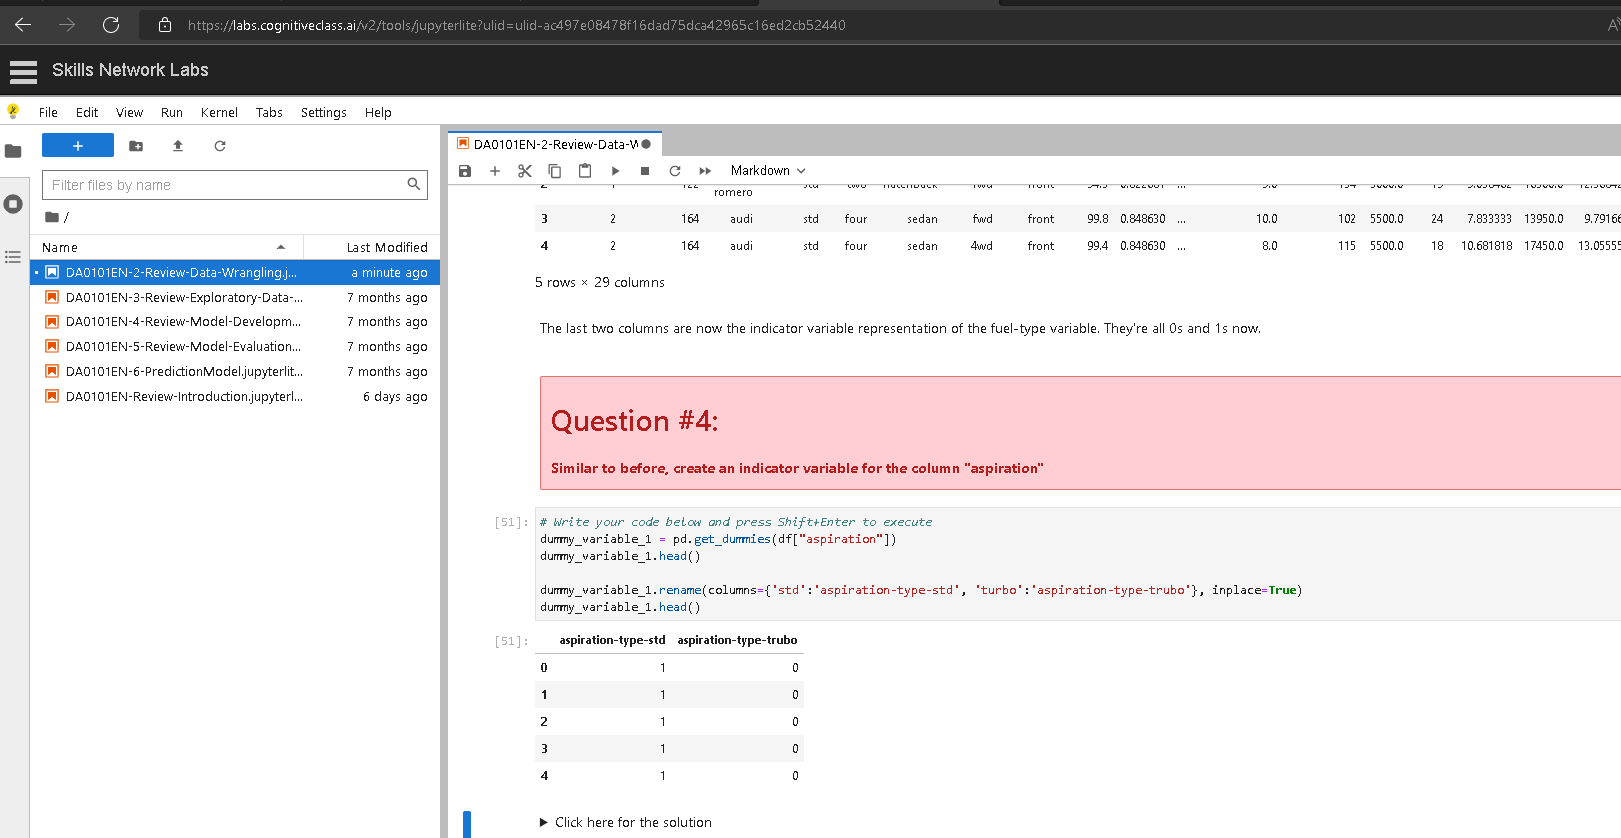

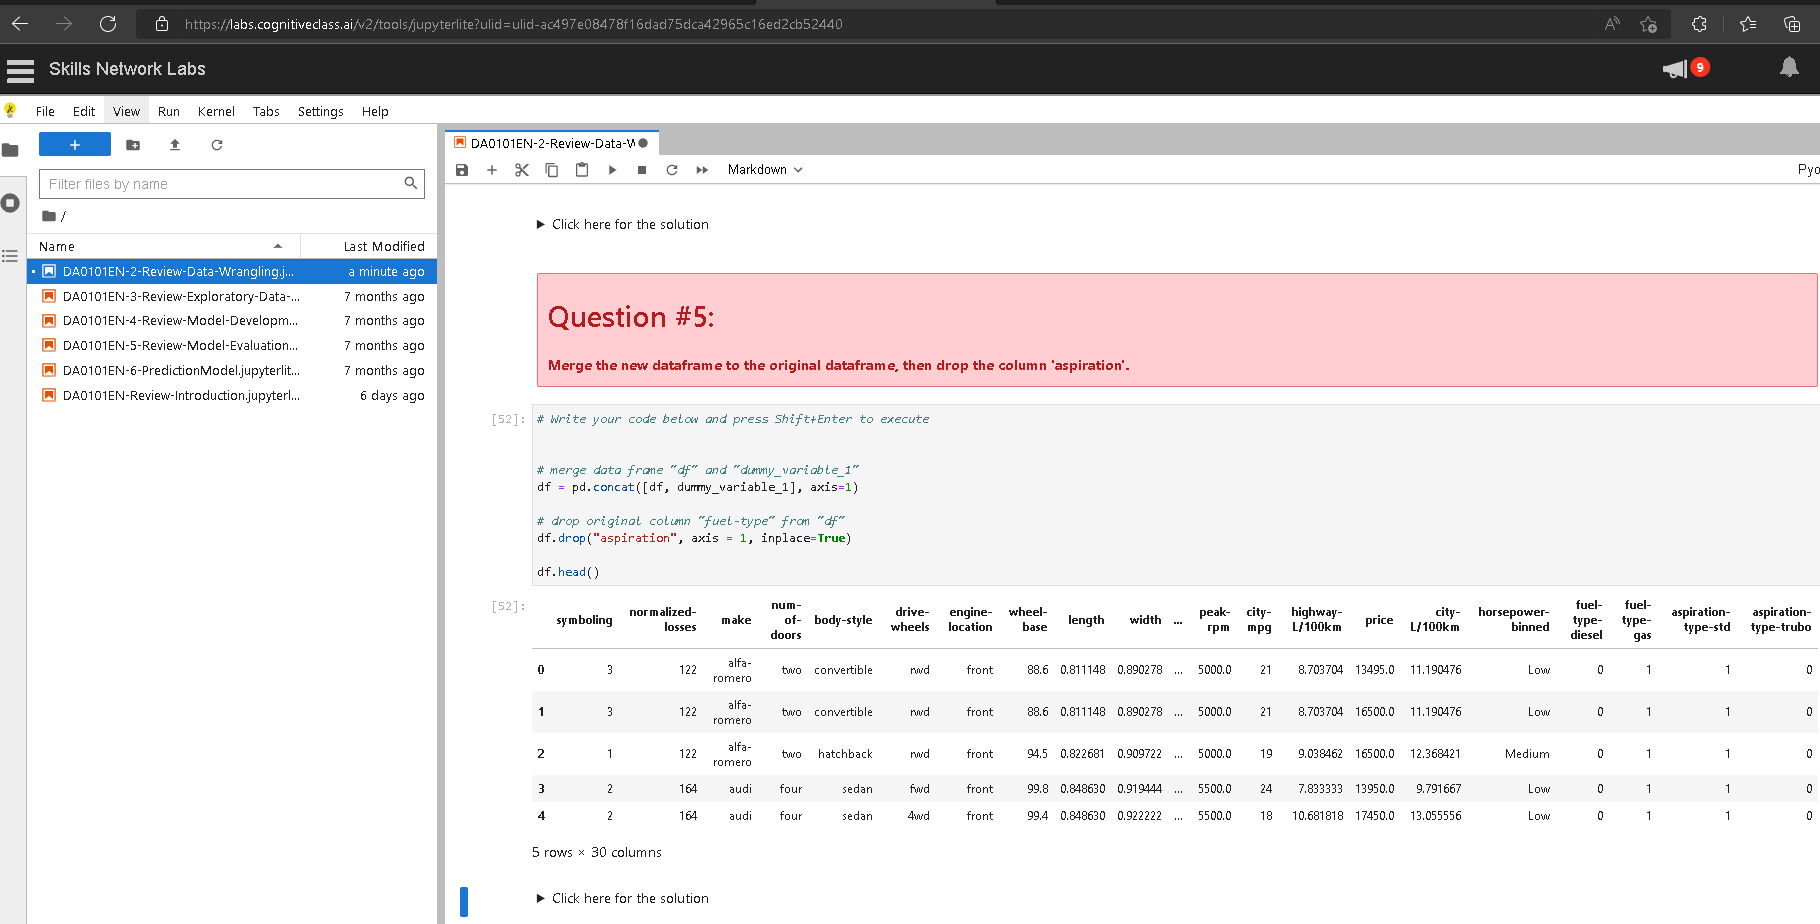

# **Graded Review Questions**

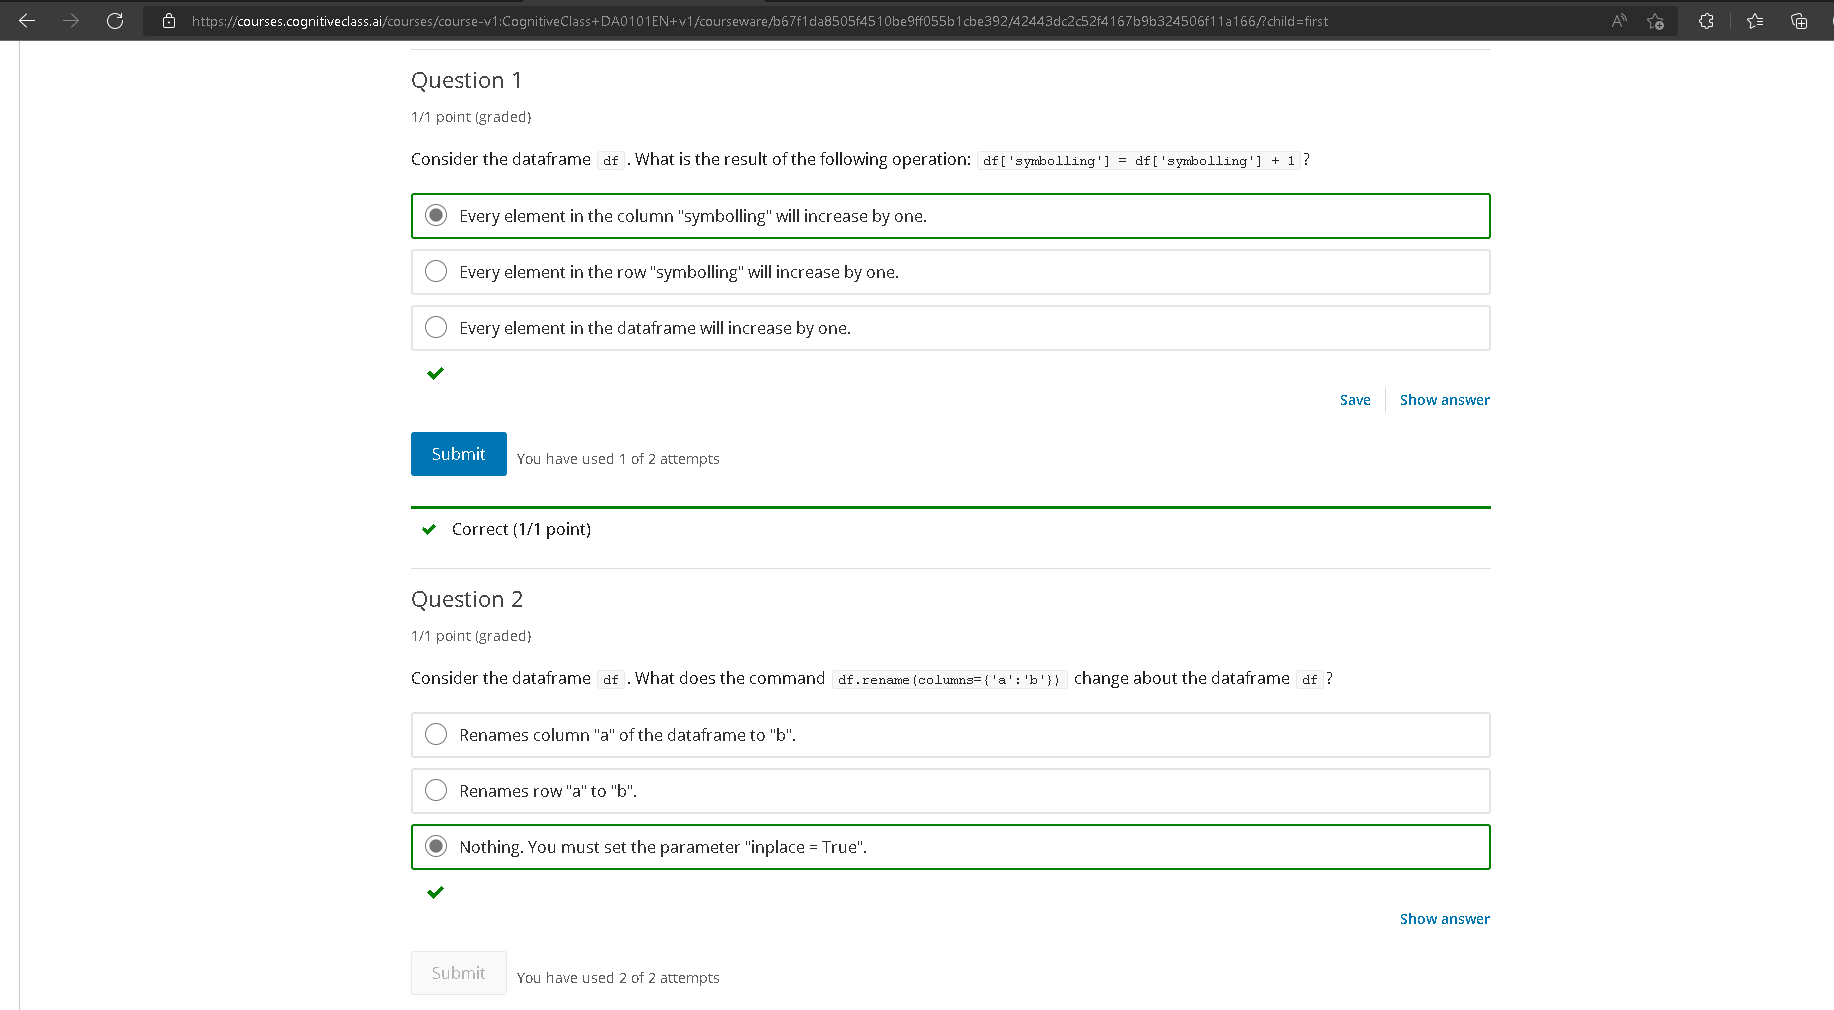

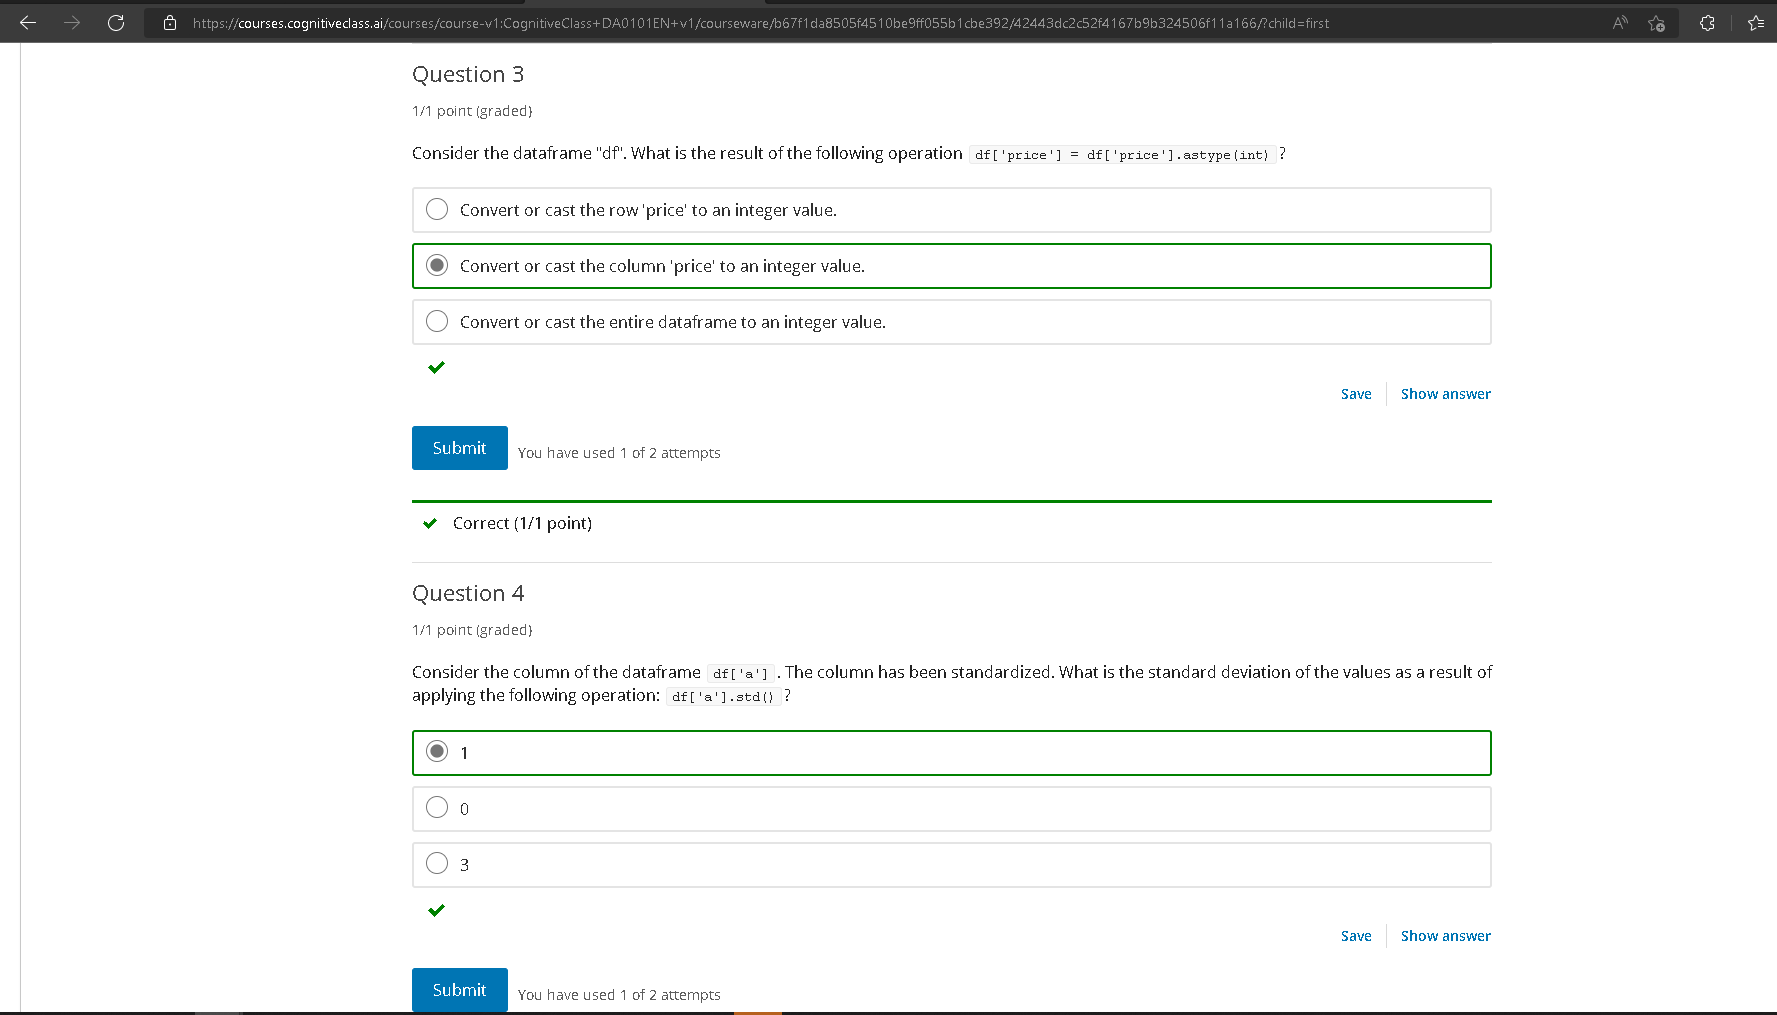

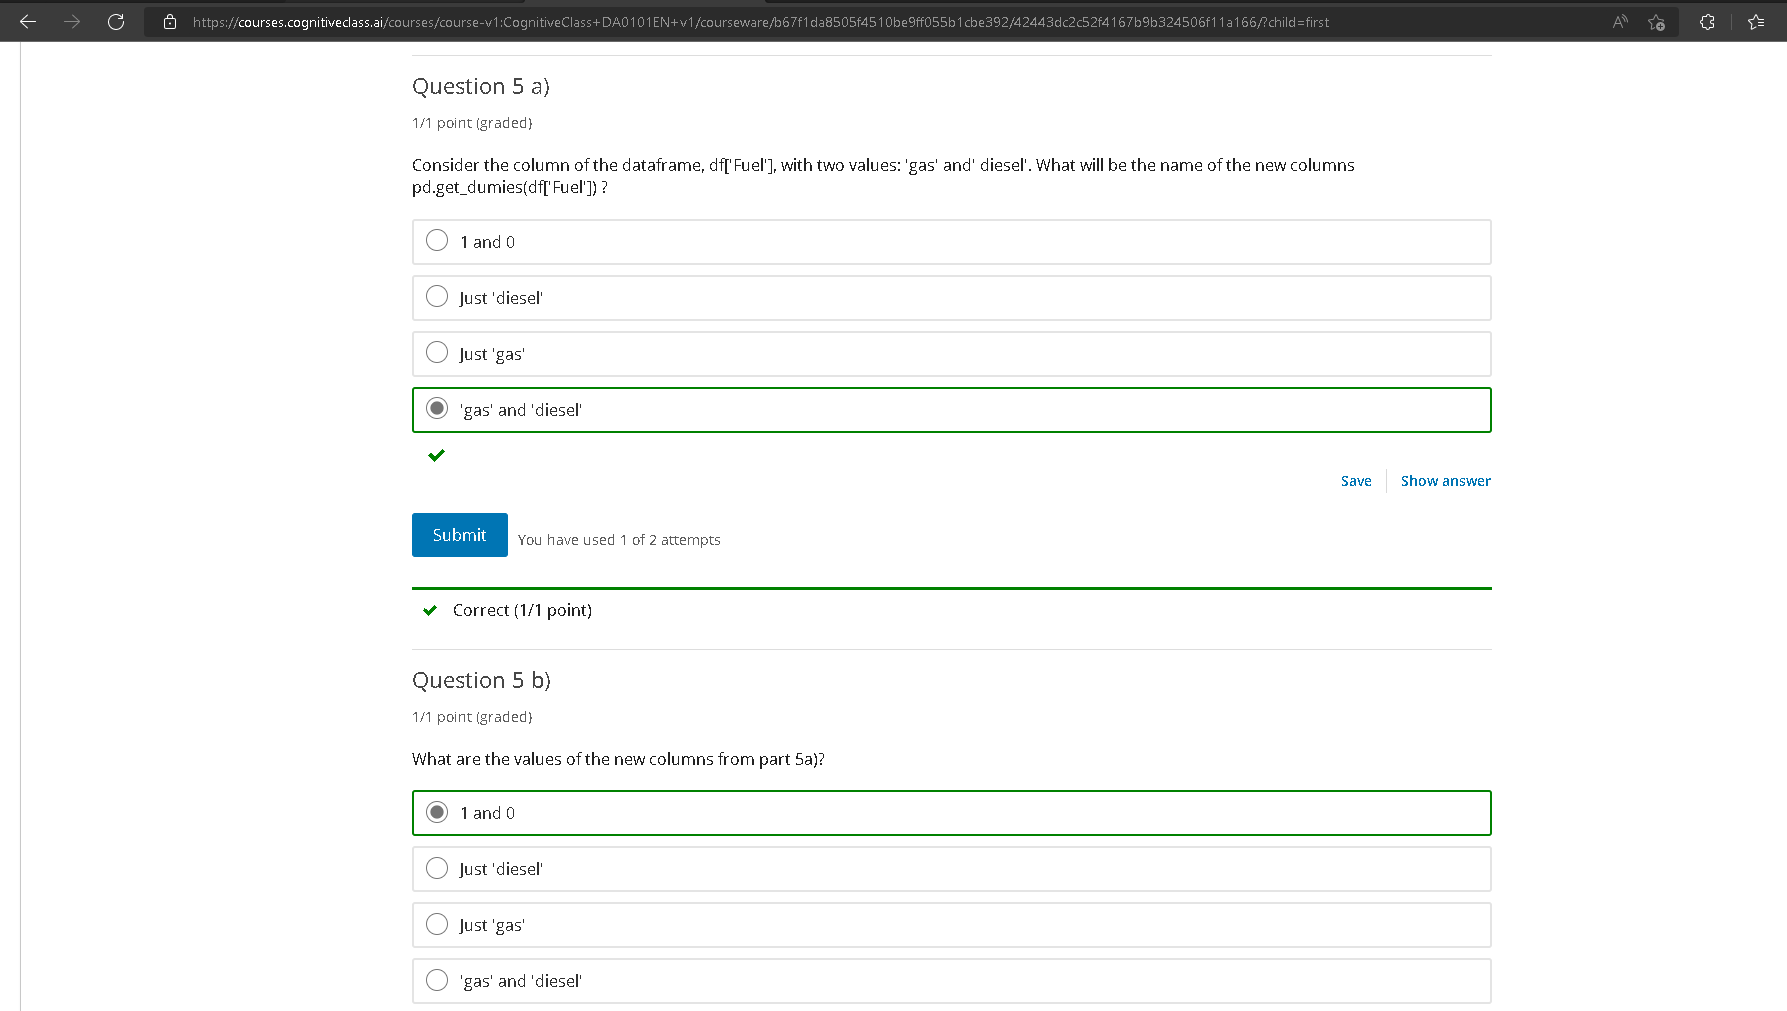